<a href="https://colab.research.google.com/github/pea-sys/Til/blob/master/OfficialSeabornTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Motivation
業務で機械学習を利用した新機能を画策中  
現在も１つ提案している。職場において機械学習の理解者がゼロなので、
アウトプットの説明力を強化する必要があると感じる。企画も通りやすくなる。  
取り合えず、serbornの様々な図の表現方法を学ぶことで資料（データ）の説明力を強化したい。

[参考URL](https://seaborn.pydata.org/tutorial.html)


# 統計的関係の視覚化


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

#### 変数を散布図に関連付ける
2つの変数の共同分布を示します

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


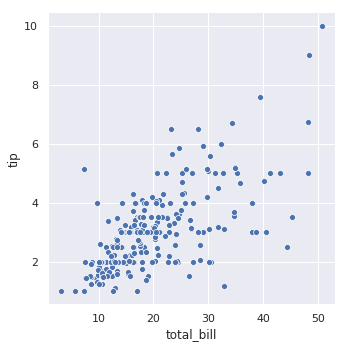

In [3]:
sns.relplot(x="total_bill", y="tip", data=tips)

ポイントは2次元でプロットされますが、3番目の変数に従ってポイントに色を付けることで、  
別のディメンションをプロットに追加できます。   
Seabornでは、これは「色相セマンティック」の使用と呼ばれます。これは、ポイントの色に意味が得られるためです。

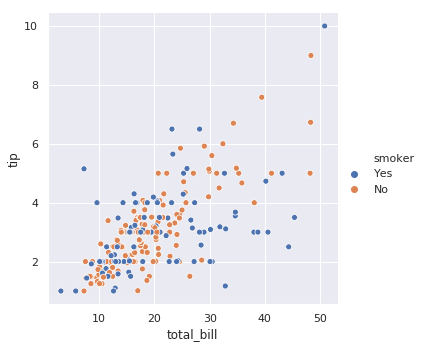

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

クラス間の違いを強調し、アクセシビリティを向上させるために、クラスごとに異なるマーカースタイルを使用できます。

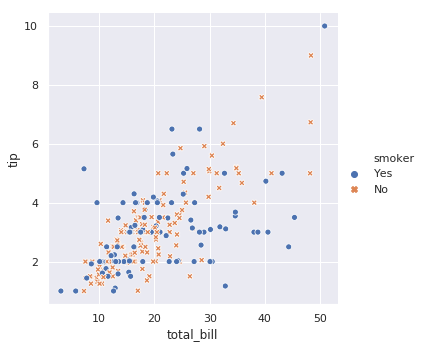

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",data=tips);

各ポイントの色相とスタイルを個別に変更することにより、4つの変数を表すこともできます。  
しかし、目は色よりも形に敏感であるため、これは慎重に行う必要があります。

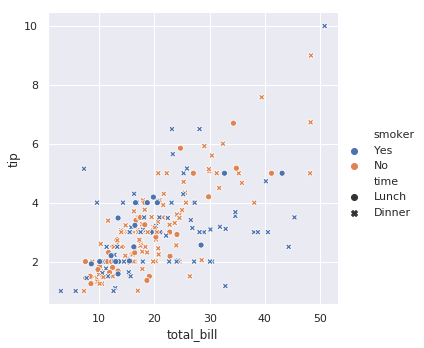

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

上記の例では、色相のセマンティックはカテゴリカルであったため、デフォルトの定性パレットが適用されました。  
色相のセマンティクスが数値の場合（具体的には、floatにキャストできる場合）、デフォルトのカラーリングは順次パレットに切り替わります

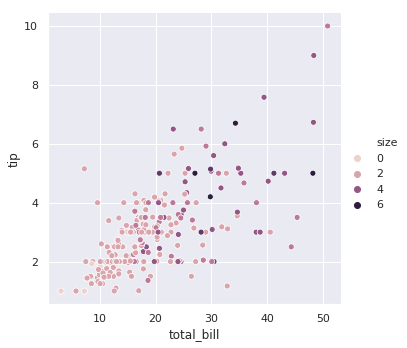

In [7]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

どちらの場合でも、カラーパレットをカスタマイズできます。  
そうするための多くのオプションがあります。  
ここでは、cubehelix_palette（）への文字列インターフェイスを使用して、シーケンシャルパレットをカスタマイズします。

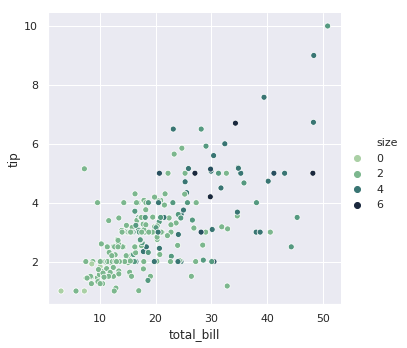

In [8]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)


3番目の種類のセマンティック変数は、各ポイントのサイズを変更します。

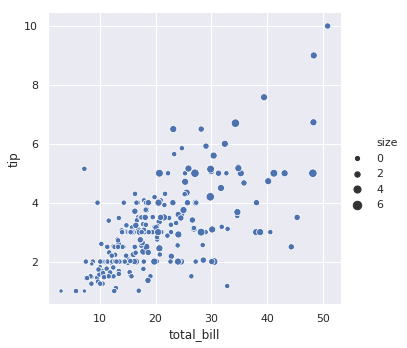

In [9]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

matplotlib.pyplot.scatter（）とは異なり、変数のリテラル値はポイントの領域を選択するために使用されません。  
代わりに、データ単位の値の範囲は、面積単位の範囲に正規化されます。この範囲はカスタマイズできます

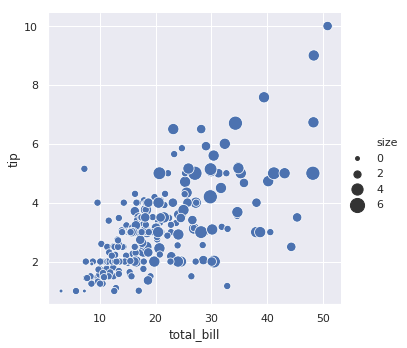

In [10]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

さまざまなセマンティクスを使用して統計的な関係を示す方法をカスタマイズするためのその他の  
例は、scatterplot（）APIの例に示されています

#### ラインプロットで連続性を強調する
散布図は非常に効果的ですが、普遍的に最適な視覚化のタイプはありません。  
代わりに、視覚的表現は、データセットの詳細とプロットで答えようとしている質問に適合させる必要があります。

In [11]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,-0.245352
1,1,0.258356
2,2,-1.753507
3,3,-2.110708
4,4,-1.137738


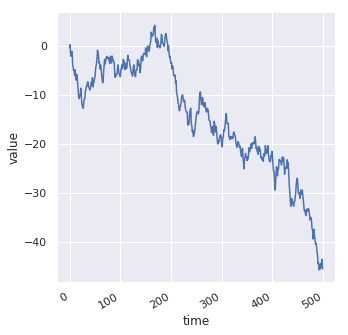

In [12]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

lineplot（）は、最も頻繁にyをxの関数として描画しようとしていると想定しているため、  
デフォルトの動作では、プロットする前にx値でデータをソートします。ただし、これは無効にできます。

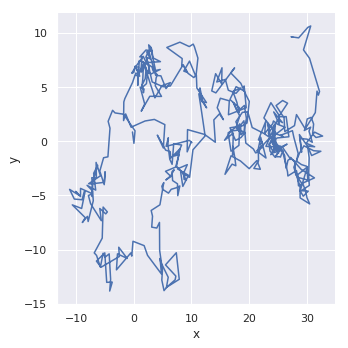

In [13]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

#### 集計と不確実性の表現
より複雑なデータセットでは、x変数の同じ値に対して複数の測定値があります。  
seabornのデフォルトの動作では、平均と平均の周りの95％信頼区間をプロットすることにより、各x値で複数の測定値を集約します。

In [14]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


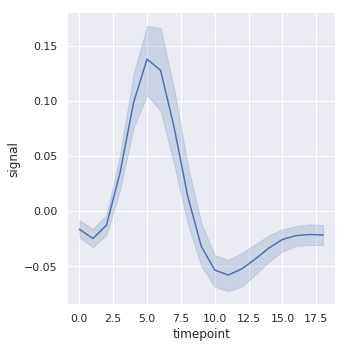

In [15]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

信頼区間は、ブートストラップを使用して計算されます。  
これは、大規模なデータセットでは時間がかかる場合があります。したがって、それらを無効にすることができます。

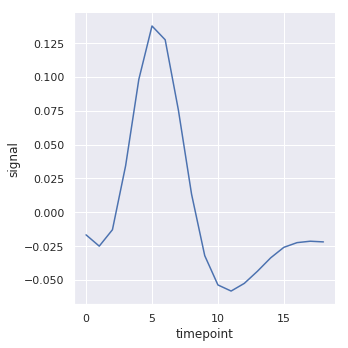

In [16]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

特に大きなデータの場合、信頼区間の代わりに標準偏差をプロットすることにより、  
各時点での分布の広がりを表すこともできます。

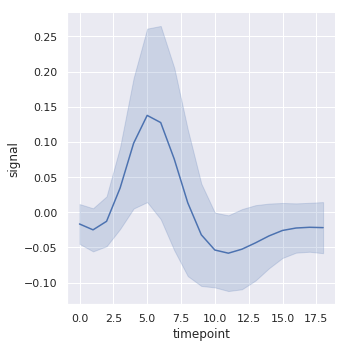

In [17]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

集計を完全にオフにするには、推定器パラメーターを[なし]に設定します。  
これにより、データに各ポイントで複数の観測がある場合、奇妙な効果が生じる可能性があります。

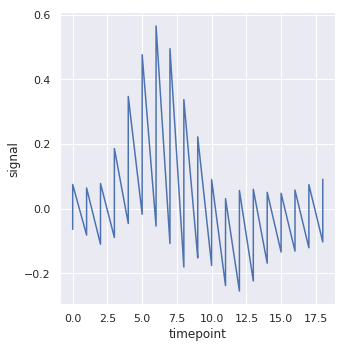

In [18]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri)

#### セマンティックマッピングを使用したデータのサブセットのプロット
lineplot（）関数にはscatterplot（）と同じ柔軟性があります  
プロット要素の色相、サイズ、スタイルを変更することにより、最大3つの追加変数を表示できます。  
これは、scatterplot（）と同じAPIを使用して行われます。つまり、matplotlibの線と点の外観を制御するパラメーターを停止して考える必要はありません。

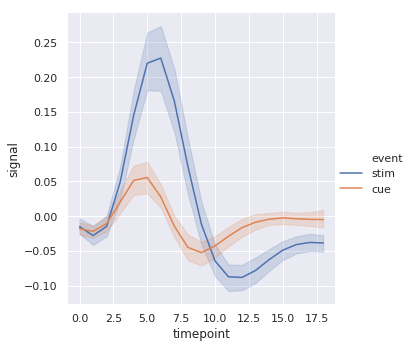

In [19]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

線プロットにスタイルセマンティックを追加すると、デフォルトで線のダッシュのパターンが変更されます。

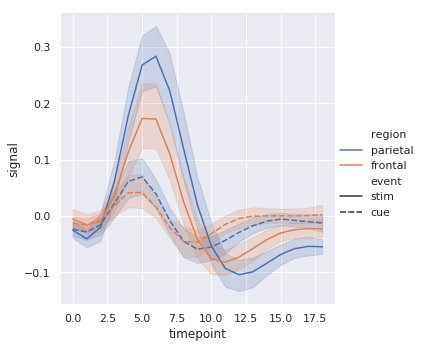

In [20]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",kind="line", data=fmri);

ただし、各観測で使用されるマーカーによって、ダッシュと一緒に、またはそれらの代わりにサブセットを識別できます。

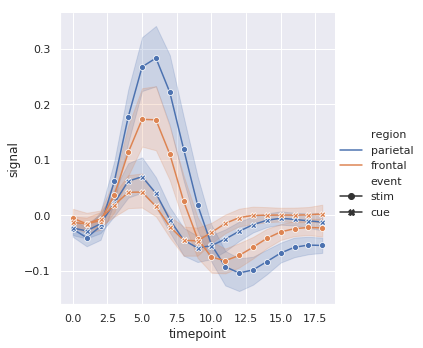

In [21]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

散布図と同様に、複数のセマンティクスを使用してラインプロットを作成する場合は注意が必要です。情報を提供することもありますが、解析と解釈が困難な場合もあります。ただし、1つの追加変数の変更のみを調べている場合でも、線の色とスタイルの両方を変更すると便利です。これにより、白黒で印刷したり、色覚異常のある人が見たりしたときに、プロットがよりアクセスしやすくなります。

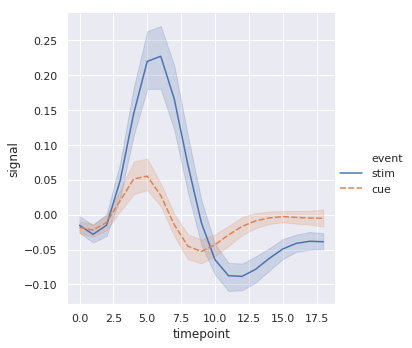

In [22]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

反復測定データで作業している場合（つまり、複数回サンプリングされたユニットがある場合）、セマンティクスで区別せずに各サンプリングユニットを個別にプロットすることもできます。これにより、凡例が乱雑になりません。

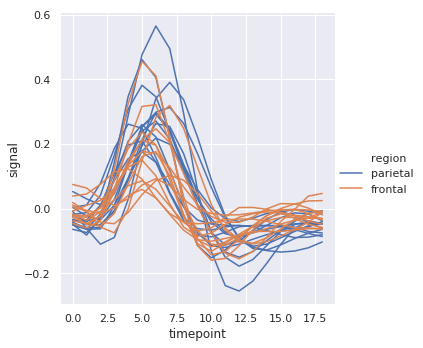

In [23]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

デフォルトのカラーマップとlineplot（）の凡例の処理は、色相の意味がカテゴリカルか数値かによっても異なります。

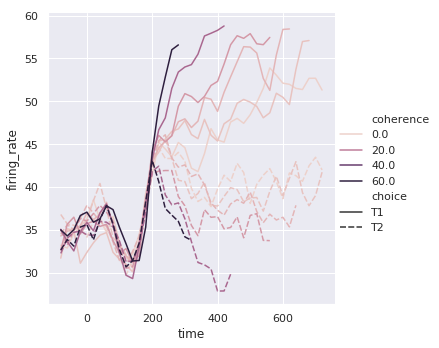

In [24]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

色相変数が数値であっても、線形カラースケールでは不十分に表現されることがあります。　　
この場合、色相変数のレベルは対数的にスケーリングされます。リストまたは辞書を渡すことで、各行に特定の色の値を指定できます。

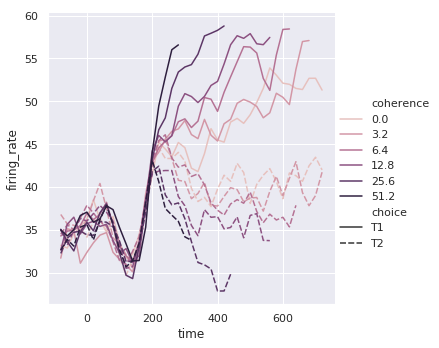

In [25]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

または、カラーマップの正規化方法を変更できます。

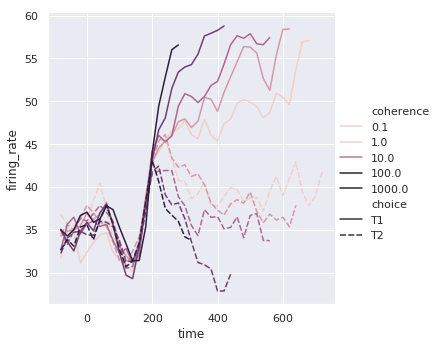

In [26]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots);

3番目の意味であるサイズは、行の幅を変更します。

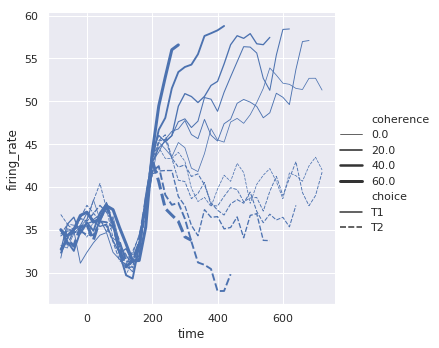

In [27]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);


サイズ変数は通常数値ですが、カテゴリ変数を線の幅にマッピングすることもできます。  

「太い」線と「細い」線よりもはるかに区別するのが難しいため、その際には注意してください。ただし、線に高頻度の変動がある場合、ダッシュは認識しにくい場合があるため、その場合は異なる幅を使用する方が効果的です。

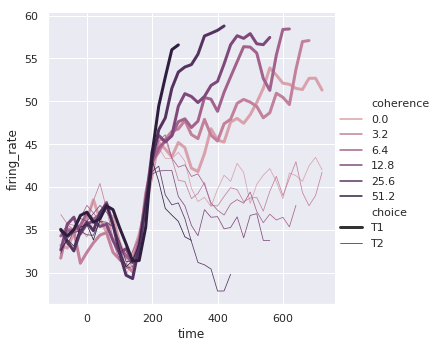

In [28]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

#### 日付データでプロットする
ラインプロットは、実際の日付と時刻に関連するデータを視覚化するためによく使用されます。  
これらの関数は、元の形式でデータを元のmatplotlib関数に渡します。  
したがって、目盛りラベルの日付を書式設定するmatplotlibの機能を利用できます。ただし、その書式設定はすべてmatplotlibレイヤーで行う必要があります。matplotlibのドキュメントを参照して、その動作を確認する必要があります。

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


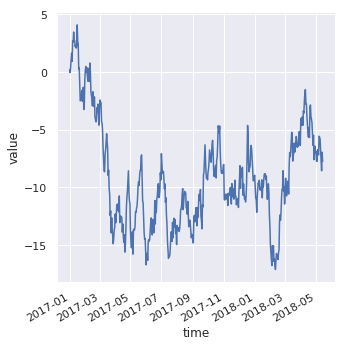

In [29]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

#### ファセットとの複数の関係の表示
このチュートリアルでは、これらの関数が一度に複数のセマンティック変数を表示できることを強調しましたが、常に有効であるとは限りません。  
しかし、2つの変数間の関係が他の複数の変数にどのように依存するかを理解したい場合はどうでしょうか。

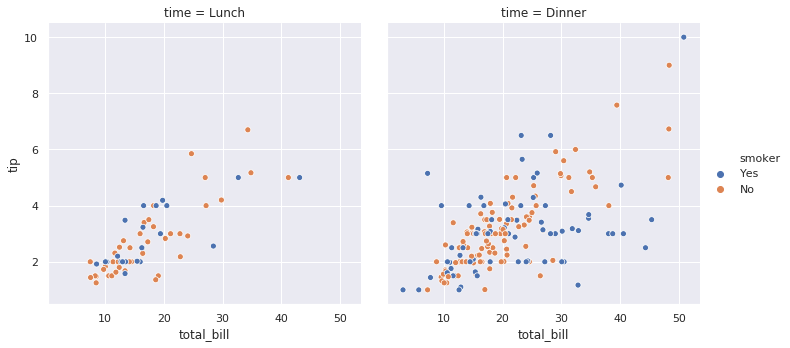

In [30]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

この方法で、2つの変数の影響を表示することもできます。1つは列をファセットし、  
もう1つは行をファセットすることです。グリッドにさらに変数を追加し始めると、図のサイズを小さくすることができます。   
FacetGridのサイズは、各ファセットの高さとアスペクト比によってパラメーター化されることに注意してください。

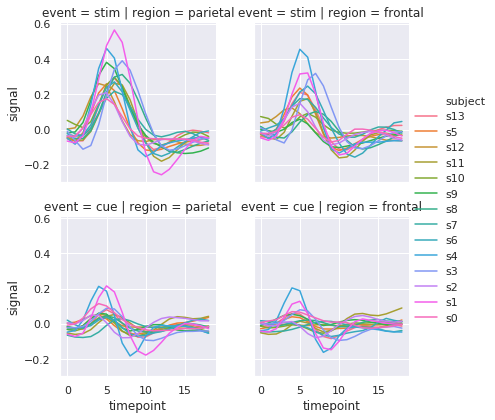

In [31]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

変数の多くのレベルで効果を調べたい場合、列でその変数をファセットし、ファセットを行に「ラップ」することをお勧めします。

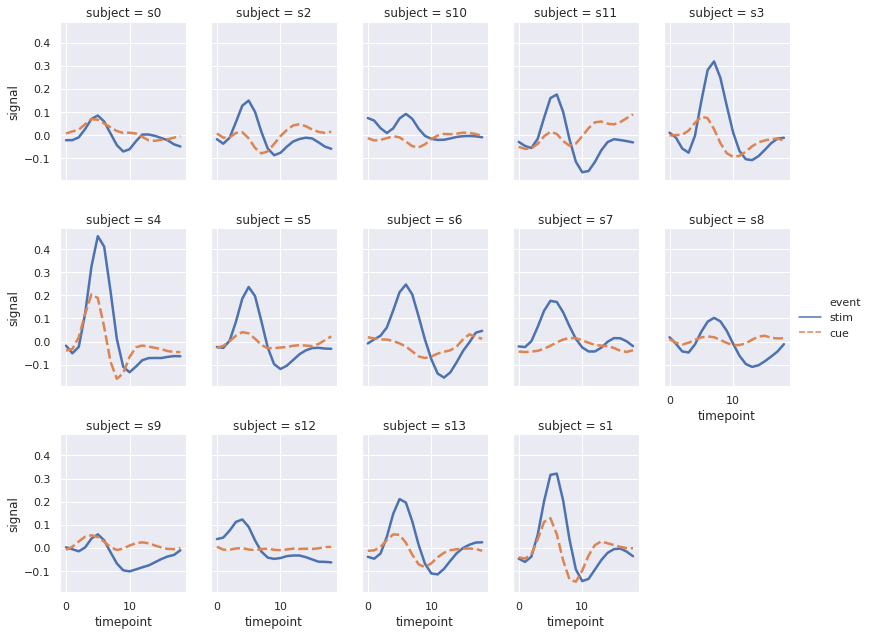

In [32]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

これらの視覚化はしばしば「格子」プロットまたは「小倍数」と呼ばれ、  
全体のパターンとそれらのパターンからの逸脱の両方を目で簡単に検出できる形式でデータを提示するため、非常に効果的です。  
scatterplot（）およびrelplot（）によって提供される柔軟性を利用する必要がありますが、いくつかの単純なプロットは通常、1つの複雑なプロットよりも効果的であることを常に念頭に置いてください。

# カテゴリカルデータを使用したプロット
リレーショナルプロットチュートリアルでは、異なる視覚表現を使用して、  
データセット内の複数の変数間の関係を示す方法を見ました。  
例では、主な関係が2つの数値変数の間である場合に焦点を当てました。主な変数の1つが「カテゴリ」（個別のグループに分割されている）である場合、視覚化により特化したアプローチを使用すると役立ちます。

Categorical scatterplots:

* stripplot() (with kind="strip"; the default)
* swarmplot() (with kind="swarm")

Categorical distribution plots:

* boxplot() (with kind="box")
* violinplot() (with kind="violin")
* boxenplot() (with kind="boxen")

Categorical estimate plots:

* pointplot() (with kind="point")
* barplot() (with kind="bar")
* countplot() (with kind="count")  




これらのファミリは、さまざまなレベルの粒度を使用してデータを表します。  
どちらを使用するかがわかったら、答えたい質問について考える必要があります。統合APIを使用すると、さまざまな種類を簡単に切り替えて、いくつかの観点からデータを表示できます。

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

#### カテゴリカル散布図

catplot（）のデータのデフォルト表現では、散布図が使用されます。実際、seabornには2つの異なるカテゴリ散布図があります。カテゴリデータを散布図で表す際の主な課題を解決するためのさまざまなアプローチを採用しています。つまり、1つのカテゴリに属する​​すべてのポイントが、カテゴリ変数に対応する軸に沿った同じ位置にあります。 catplot（）のデフォルトの「種類」であるstripplot（）で使用されるアプローチは、少量のランダムな「ジッター」を使用して、カテゴリ軸上のポイントの位置を調整することです。

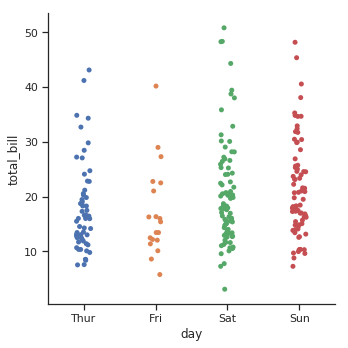

In [34]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

ジッタパラメータは、ジッタの大きさを制御するか、完全に無効にします。

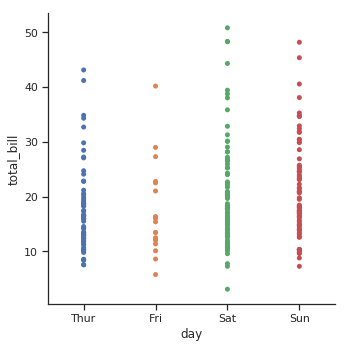

In [35]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

2番目のアプローチは、重複しないようにするアルゴリズムを使用して、  
カテゴリ軸に沿ってポイントを調整します。比較的小さなデータセットに対してのみ有効ですが、観測値の分布をより適切に表現できます。この種のプロットは「beeswarm」とも呼ばれ、sbornmplot（）によってseabornに描画されます。これは、catplot（）でkind = "swarm"を設定することでアクティブになります。

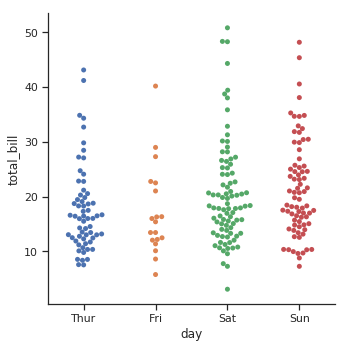

In [36]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

リレーショナルプロットと同様に、色相のセマンティックを使用して、カテゴリプロットに別の次元を追加することができます。  
（カテゴリプロットは現在、サイズまたはスタイルのセマンティクスをサポートしていません）。異なるカテゴリプロット関数はそれぞれ、色相のセマンティックを異なる方法で処理します。散布図の場合、ポイントの色を変更するだけです。

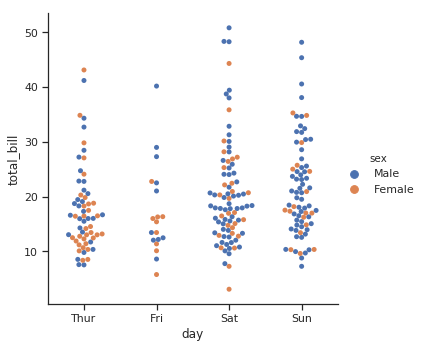

In [37]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

数値データとは異なり、カテゴリ変数のレベルをその軸に沿って順序付ける方法は必ずしも明らかではありません。  
一般に、シーボーンカテゴリカルプロット関数は、データからカテゴリの順序を推測しようとします。データにパンダカテゴリデータ型がある場合、カテゴリのデフォルトの順序をそこに設定できます。カテゴリ軸に渡された変数が数値に見える場合、レベルはソートされます。ただし、データはカテゴリとして扱われ、番号を使用してラベルを付ける場合でも、カテゴリ軸の順序位置（具体的には0、1、…）に描画されます。

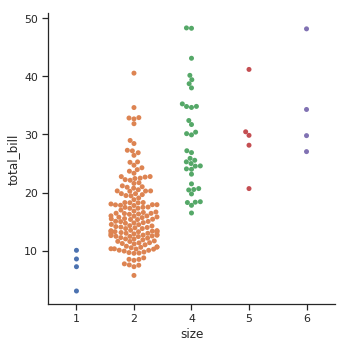

In [38]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

デフォルトの順序を選択するもう1つのオプションは、データセットに表示されるカテゴリのレベルを取得することです。  
順序は、orderパラメーターを使用して、プロット固有の基準で制御することもできます。これは、同じ図に複数のカテゴリプロットを描画するときに重要になることがあります。これについては、以下で詳しく説明します。

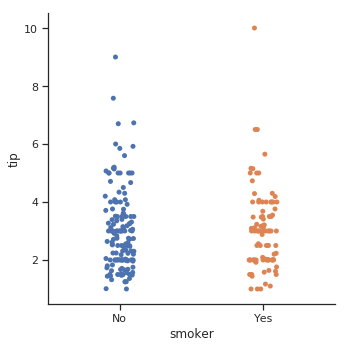

In [39]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

「カテゴリ軸」という考え方に言及しました。これらの例では、常に水平軸に対応しています。ただし、カテゴリ変数を縦軸に配置すると便利です（特に、カテゴリ名が比較的長い場合やカテゴリが多い場合）。これを行うには、軸への変数の割り当てを交換します。

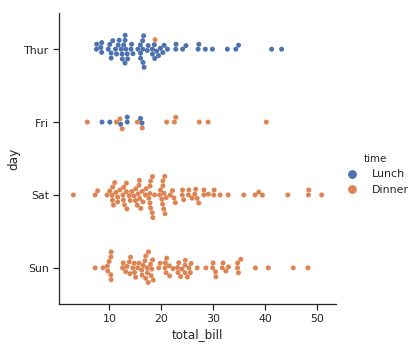

In [40]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

#### カテゴリ内の観測値の分布
データセットのサイズが大きくなると、カテゴリ別散布図は、各カテゴリ内の値の分布について提供できる情報が制限されます。これが発生した場合、カテゴリレベル全体で簡単に比較できるように分布情報を要約する方法がいくつかあります。

#### ボックスプロット
1つ目は、おなじみのboxplot（）です。この種類のプロットは、分布の3つの四分位値と極値を示しています。 「ウィスカ」は、下四分位および上四分位の1.5 IQR内にあるポイントまで拡張され、この範囲外の観測値は独立して表示されます。これは、箱ひげ図の各値がデータの実際の観測値に対応することを意味します。

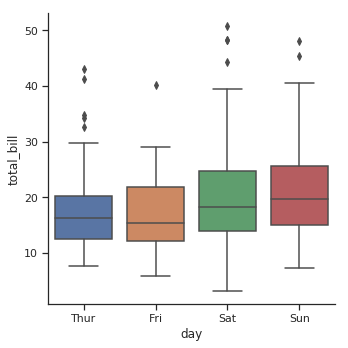

In [41]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

色相のセマンティックを追加する場合、セマンティック変数の各レベルのボックスはカテゴリ軸に沿って移動されるため、それらは重複しません。

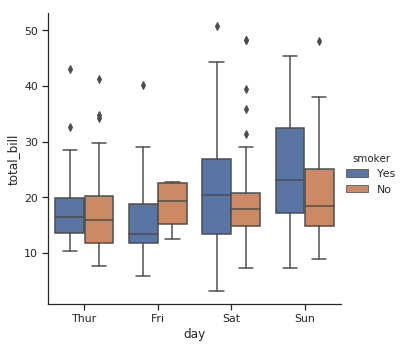

In [42]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

この動作は「回避」と呼ばれ、セマンティック変数がメインのカテゴリ変数内にネストされていると想定されるため、デフォルトでオンになっています。そうでない場合は、覆い焼きを無効にすることができます。

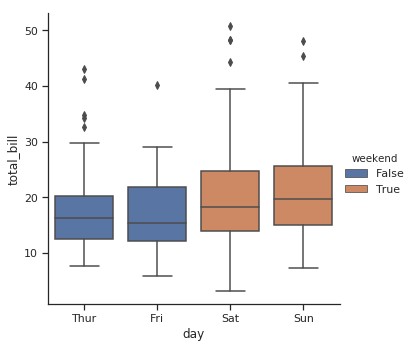

In [43]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

関連する関数boxenplot（）は、ボックスプロットに似ていますが、分布の形状に関する詳細情報を表示するために最適化されたプロットを描画します。大規模なデータセットに最適です。

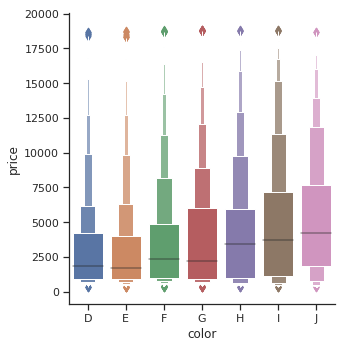

In [44]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

#### バイオリンプロット

別のアプローチはviolinplot（）です。これは、ボックスプロットと分布チュートリアルで説明されているカーネル密度推定手順を組み合わせたものです。

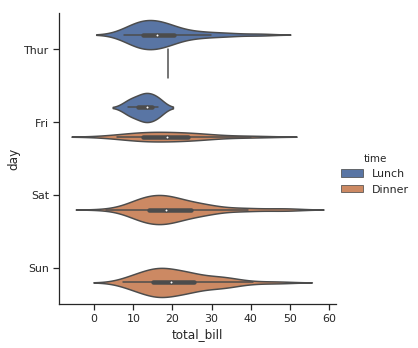

In [45]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

このアプローチでは、カーネル密度の推定値を使用して、値の分布をより詳細に記述します。さらに、箱ひげ図からの四分位数とウィーカー値はバイオリンの内側に表示されます。欠点は、バイオリンプロットがKDEを使用するため、微調整が必​​要な他のパラメーターがいくつかあり、単純なボックスプロットに比べて複雑さが増すことです。  

※カーネル密度推定（Kernel density estimation）はノンパラメトリックな確率密度関数の推定法

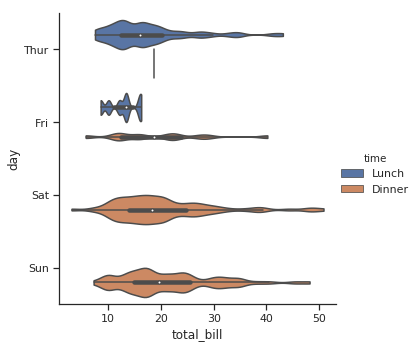

In [46]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.15, cut=0,
            data=tips);

色相パラメーターのレベルが2つしかない場合は、バイオリンを「分割」することもできます。これにより、スペースをより効率的に使用できます。

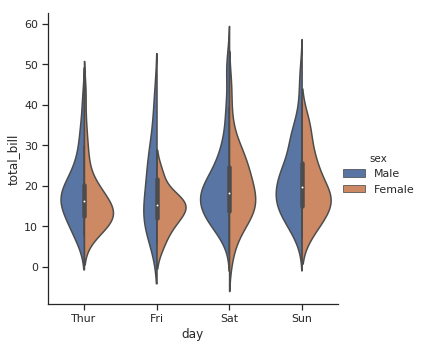

In [47]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

最後に、バイオリンの内部に描画されるプロットには、サマリーボックスプロット値の代わりに個々の観測値を表示する方法など、いくつかのオプションがあります。

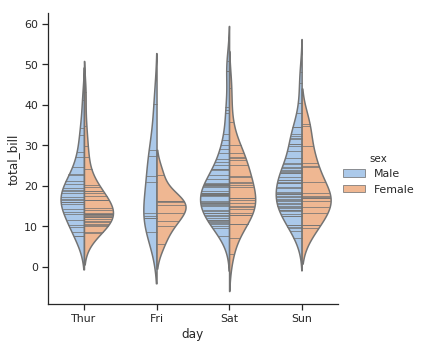

In [48]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

swarmplot（）またはstriplot（）をボックスプロットまたはバイオリンプロットと組み合わせて、分布の概要とともに各観測値を表示することも役立ちます。

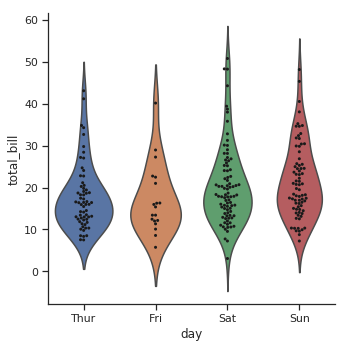

In [49]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

# カテゴリ内の統計的推定
他のアプリケーションでは、各カテゴリ内の分布を表示するのではなく、値の中心傾向の推定値を表示することができます。   
Seabornには、この情報を表示する2つの主な方法があります。重要なことに、これらの関数の基本的なAPIは、上記で説明したものと同じです。

#### 棒グラフ
この目標を達成するおなじみのスタイルのプロットは、棒グラフです。 seabornでは、barplot（）関数は完全なデータセットで動作し、関数を適用して推定値を取得します（デフォルトで平均を取ります）。各カテゴリに複数の観測値がある場合、ブートストラップを使用して推定値の周りの信頼区間を計算し、エラーバーを使用してプロットします。

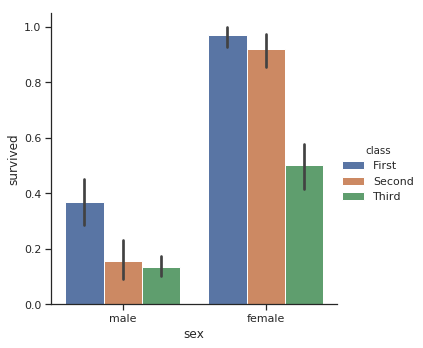

In [50]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

バープロットの特殊なケースは、2番目の変数の統計を計算するのではなく、各カテゴリの観測値の数を表示する場合です。これは、量的変数ではなく、カテゴリ変数上のヒストグラムに似ています。 seabornでは、countplot（）関数を使用して簡単に行うことができます。

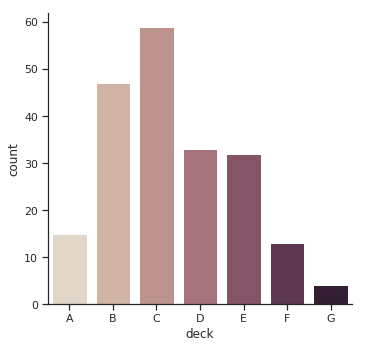

In [51]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

barplot（）とcountplot（）は両方とも、上記で説明したすべてのオプションとともに、各関数の詳細なドキュメントで示されている他のオプションとともに呼び出すことができます。

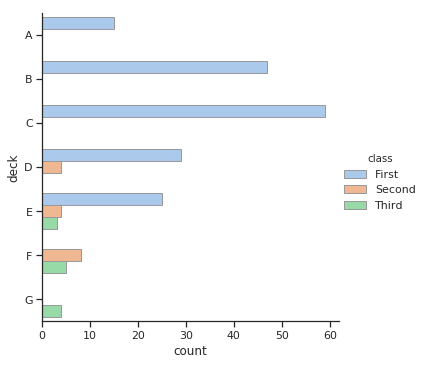

In [52]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

#### 点プロット
同じ情報を視覚化するための代替スタイルは、pointplot（）関数によって提供されます。この関数は、他の軸に高さを持つ推定値もエンコードしますが、完全なバーを表示するのではなく、ポイント推定値と信頼区間をプロットします。さらに、pointplot（）は同じ色相カテゴリのポイントを接続します。これにより、主な関係が色相のセマンティクスの関数としてどのように変化しているかを簡単に確認できます。これは、目が傾斜の違いに非常に優れているためです。

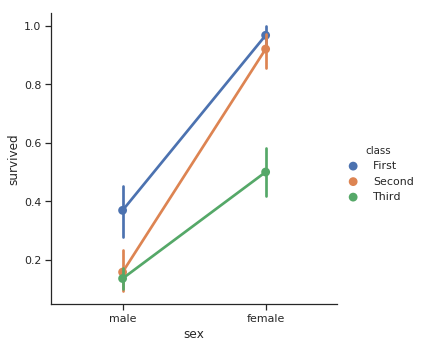

In [53]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

カテゴリ関数にリレーショナル関数のスタイルセマンティックが欠けている場合でも、マーカーやラインスタイルを色相とともに変化させて、最大限にアクセスしやすく、白黒で再現できる図形を作成することをお勧めします。

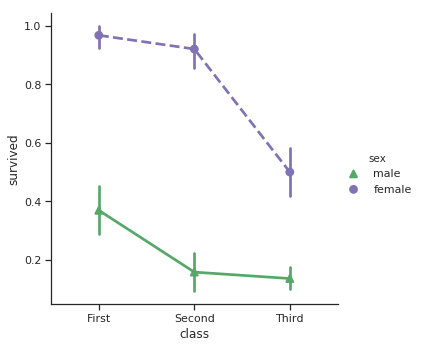

In [54]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

#### 「ワイドフォーム」データのプロット
「長形式」または「整頓された」データを使用することが推奨されますが、これらの関数は、DataFramesまたは2次元numpy配列など、さまざまな形式の「ワイド形式」データにも適用できます。これらのオブジェクトは、データパラメーターに直接渡す必要があります。

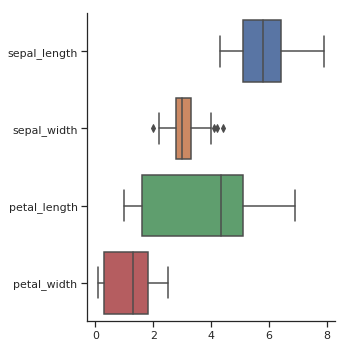

In [55]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box");

さらに、軸レベルの関数は、DataFrameの変数ではなく、Pandasまたはnumpyオブジェクトのベクトルを受け入れます。

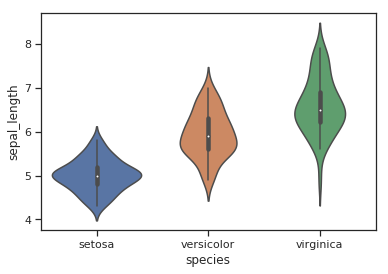

In [56]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

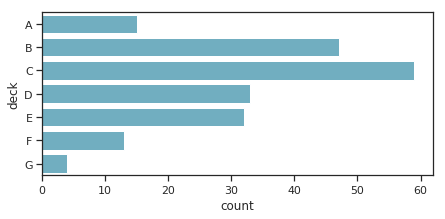

In [57]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

これは、より複雑な図と他の種類のプロットをうまく共存させるためにカテゴリ図が必要な場合にとるべきアプローチです。
## ファセットとの複数の関係の表示

relplot（）と同様に、catplot（）はFacetGrid上に構築されているため、ファセット変数を簡単に追加して高次元の関係を視覚化できます。

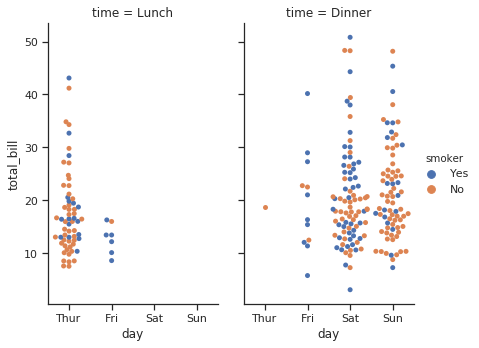

In [58]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

プロットをさらにカスタマイズするには、返されるFacetGridオブジェクトのメソッドを使用できます。

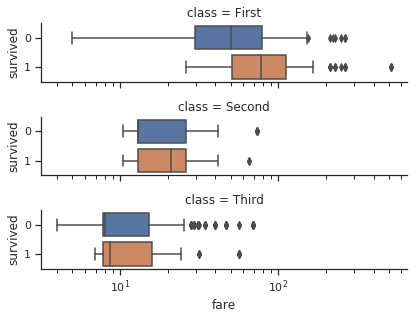

In [59]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

# データセットの分布を視覚化する
一連のデータを扱う場合、多くの場合、最初に行うことは、変数がどのように分布しているかを把握することです。チュートリアルのこの章では、一変量および二変量分布を調べるためのseabornのツールのいくつかを簡単に紹介します。他の変数のレベル間で変数の分布を簡単に比較できるようにする関数の例については、カテゴリプロットの章を参照してください。

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
sns.set(color_codes=True)

#### 単変量分布のプロット

seabornの単変量分布を簡単に調べる最も便利な方法は、distplot（）関数です。デフォルトでは、これによりヒストグラムが描画され、カーネル密度推定（KDE）に適合します。

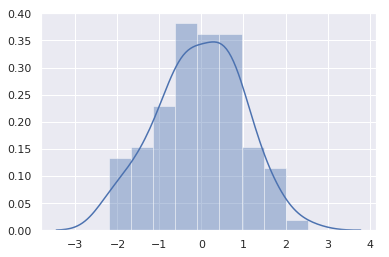

In [62]:
x = np.random.normal(size=100)
sns.distplot(x);

#### ヒストグラム
ヒストグラムはよく知られているもので、hist関数はmatplotlibに既に存在します。ヒストグラムは、データの範囲に沿ってビンを形成し、バーを描画して各ビンに含まれる観測値の数を示すことにより、データの分布を表します。

これを説明するために、密度曲線を削除して、各観測値に小さな垂直の目盛りを描くラグプロットを追加しましょう。 rugプロット自体はrugplot（）関数で作成できますが、distplot（）でも使用できます。

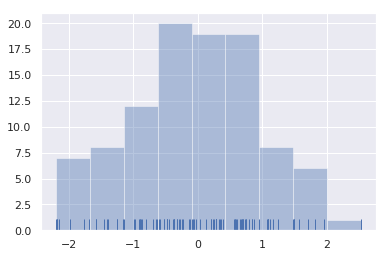

In [63]:
sns.distplot(x, kde=False, rug=True);

ヒストグラムを描画する際の主な選択肢は、使用するビンの数とそれらを配置する場所です。 distplot（）は単純なルールを使用して、デフォルトで適切な数値を推測しますが、ビンを増やしたり減らしたりすると、データ内の他の機能が明らかになる場合があります。

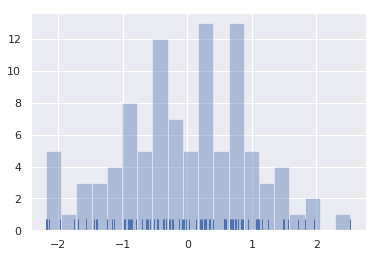

In [64]:
sns.distplot(x, bins=20, kde=False, rug=True);

#### カーネル密度推定
カーネル密度の推定はあまり馴染みがないかもしれませんが、分布の形状をプロットするための便利なツールになります。ヒストグラムと同様に、KDEプロットは、1つの軸上の観測値の密度を、他の軸に沿った高さでエンコードします。

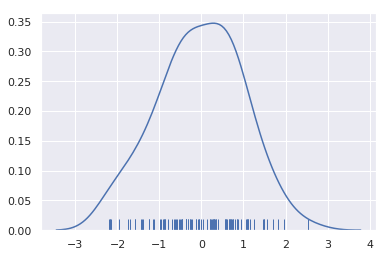

In [65]:
sns.distplot(x, hist=False, rug=True);

KDEの描画は、ヒストグラムの描画よりも計算に関与します。起こるのは、各観測値がまずその値を中心とする通常の（ガウス）曲線に置き換えられることです。

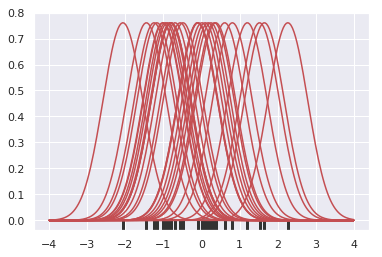

In [66]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

次に、これらの曲線を合計して、サポートグリッドの各ポイントで密度の値を計算します。結果の曲線は、その下の面積が1になるように正規化されます。

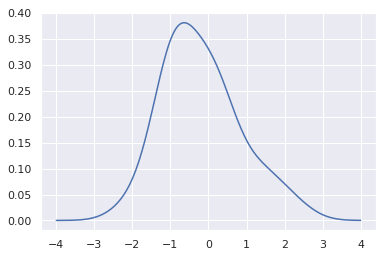

In [67]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

seabornでkdeplot（）関数を使用すると、同じ曲線が得られることがわかります。この関数はdistplot（）によって使用されますが、密度推定が必要な場合に他のオプションに簡単にアクセスできる、より直接的なインターフェースを提供します。

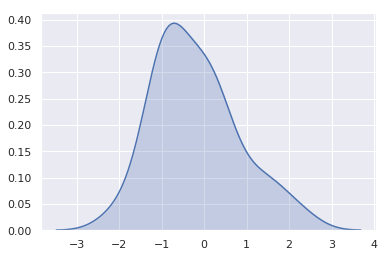

In [68]:
sns.kdeplot(x, shade=True);

KDEの帯域幅（bw）パラメーターは、ヒストグラムのビンサイズと同様に、推定がデータにどれだけ厳密に適合するかを制御します。上記でプロットしたカーネルの幅に対応します。デフォルトの動作では、共通の参照ルールを使用して適切な値を推測しようとしますが、より大きな値またはより小さな値を試すと役立つ場合があります。

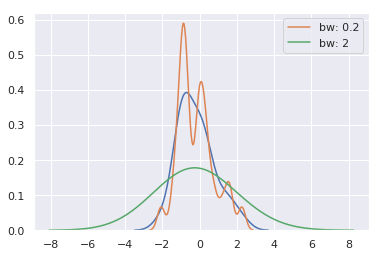

In [69]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();


上記のように、ガウスKDEプロセスの性質は、推定がデータセットの最大値と最小値を超えて拡張されることを意味します。カットパラメーターを使用して、曲線が極値をどれだけ超えて描画されるかを制御できます。ただし、これは曲線の描画方法にのみ影響し、フィット方法には影響しません。

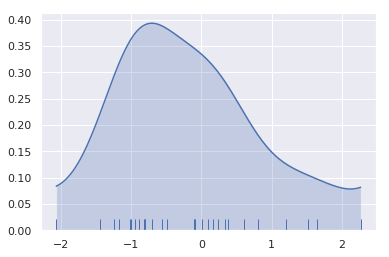

In [70]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

#### パラメトリック分布のフィッティング
distplot（）を使用して、パラメトリック分布をデータセットに適合させ、観測データにどれだけ一致するかを視覚的に評価することもできます。

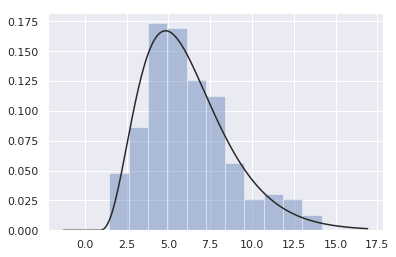

In [71]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

# 二変量分布のプロット
また、2つの変数の2変量分布を視覚化すると便利です。 seabornでこれを行う最も簡単な方法は、jointlot（）関数を使用することです。これにより、2つの変数間の2変量（またはジョイント）関係と、それぞれの単変量（または周辺）分布を示すマルチパネル図が作成されます別々の軸。

In [0]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

#### 散布図
2変量分布を視覚化する最も一般的な方法は散布図です。各プロットは、x値とy値のポイントで表示されます。これは、2次元のラグプロットに似ています。 

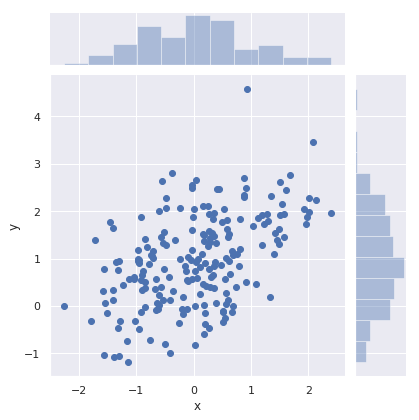

In [73]:
sns.jointplot(x="x", y="y", data=df);

#### ヘキサビンプロット
ヒストグラムの2変量アナログは、六角形のビンに含まれる観測値のカウントを示すため、「ヘキサビン」プロットとして知られています。このプロットは、比較的大きなデータセットで最適に機能します。 matplotlib plt.hexbin関数を介して、およびjointplot（）のスタイルとして使用できます。背景が白の場合に最適です：

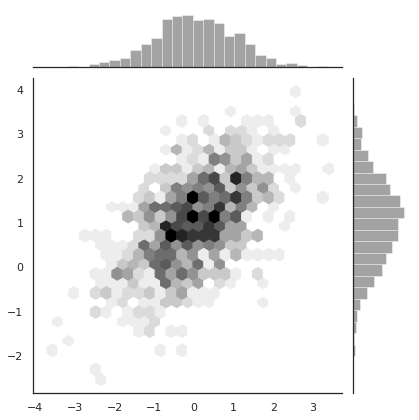

In [74]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

#### カーネル密度推定
上記のカーネル密度推定手順を使用して、2変量分布を視覚化することもできます。 seabornでは、この種のプロットは等高線プロットで表示され、jointplot（）でスタイルとして使用できます

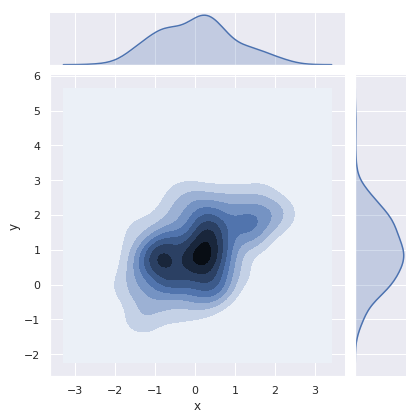

In [75]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

kdeplot（）関数を使用して、2次元のカーネル密度プロットを描画することもできます。これにより、この種のプロットを特定の（およびおそらく既存の）matplotlib軸に描画できますが、jointplot（）関数は独自のFigureを管理します。

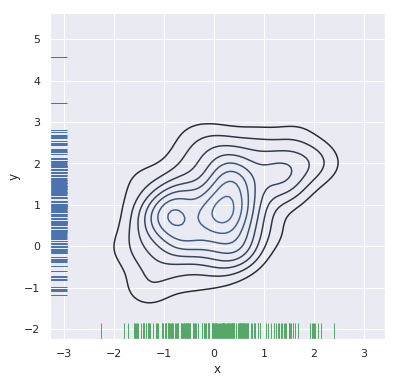

In [76]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

二変量密度をより連続的に表示したい場合は、単に等高線レベルの数を増やすことができます。

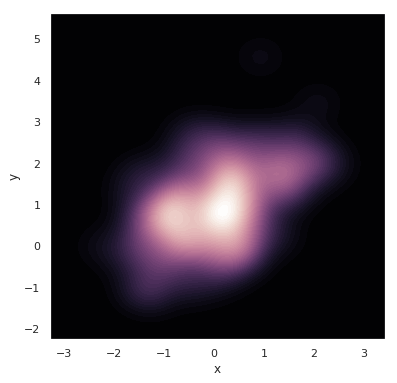

In [77]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

jointplot（）関数は、JointGridを使用して図を管理します。柔軟性を高めるために、JointGridを直接使用して図を描くことができます。 jointplot（）は、プロット後にJointGridオブジェクトを返します。これを使用して、レイヤーを追加したり、視覚化の他の側面を調整したりできます。

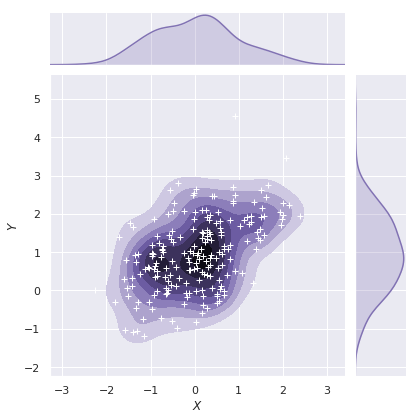

In [78]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

# データセット内のペアワイズ関係の視覚化
データセットに複数のペアワイズ二変量分布をプロットするには、pairplot（）関数を使用できます。これにより、軸のマトリックスが作成され、DataFrameの列の各ペアの関係が表示されます。デフォルトでは、対角軸上の各変数の単変量分布も描画します。

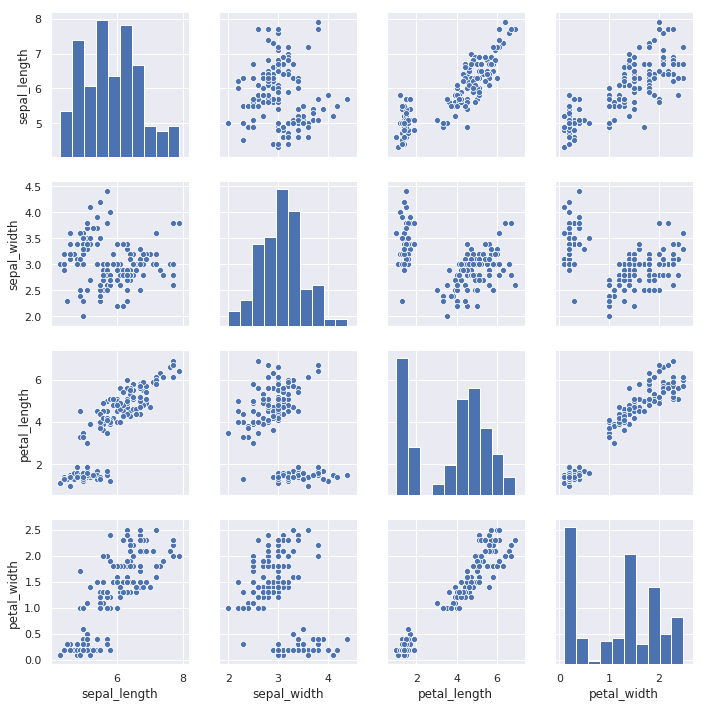

In [79]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

jointplot（）とJointGridの関係と同様に、pairplot（）関数はPairGridオブジェクトの上に構築され、より柔軟に直接使用できます。

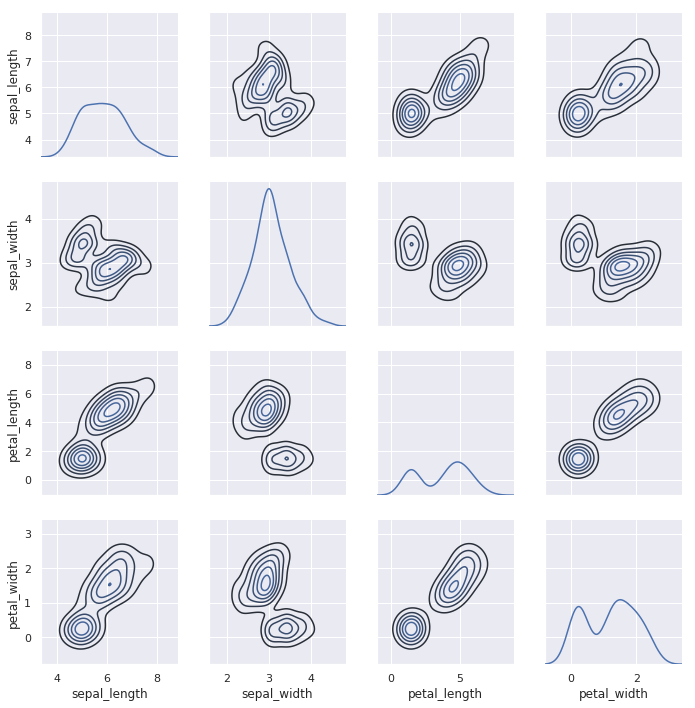

In [80]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# 線形関係の視覚化
多くのデータセットには複数の量的変数が含まれており、多くの場合、分析の目的はこれらの変数を相互に関連付けることです。以前に、2つの変数の共同分布を示すことでこれを達成できる関数について説明しました。ただし、統計モデルを使用して、2つのノイズのある観測セット間の単純な関係を推定することは非常に役立ちます。この章で説明する関数は、線形回帰の一般的なフレームワークを通じてこれを行います。

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
sns.set(color_codes=True)

In [0]:
tips = sns.load_dataset("tips")

### 線形回帰モデルを描く関数
seabornの2つの主な関数は、回帰によって決定される線形関係を視覚化するために使用されます。これらの関数、regplot（）およびlmplot（）は密接に関連しており、コア機能の多くを共有しています。ただし、特定のジョブに適したツールをすばやく選択できるように、それらの違いを理解することが重要です。

最も単純な呼び出しでは、両方の関数が2つの変数xとyの散布図を描画し、回帰モデルy〜xを近似し、結果の回帰直線とその回帰の95％信頼区間をプロットします。

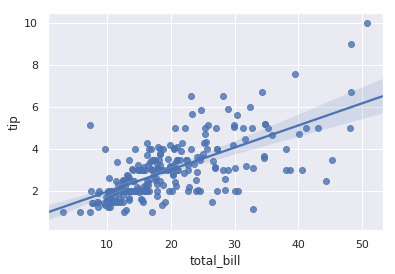

In [84]:
sns.regplot(x="total_bill", y="tip", data=tips);

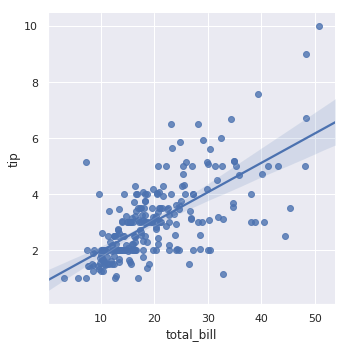

In [85]:
sns.lmplot(x="total_bill", y="tip", data=tips);

結果のプロットは、図形の形状が異なることを除いて同一であることに注意してください。なぜこれが近いのかを説明します。今のところ、知っておくべきもう1つの主な違いは、regplot（）は、単純なnumpy配列、pandas Seriesオブジェクトを含むさまざまな形式のxおよびy変数を受け入れるか、データに渡されるpandas DataFrameオブジェクトの変数への参照として受け入れることです。対照的に、lmplot（）には必須パラメーターとしてデータがあり、xおよびy変数は文字列として指定する必要があります。このデータ形式は、「長形式」または「整頓された」データと呼ばれます。この入力の柔軟性以外に、regplot（）はlmplot（）の機能のサブセットを所有しているため、後者を使用してそれらを示します。

変数の1つが離散値をとる場合、線形回帰を当てはめることができますが、この種のデータセットによって生成される単純な散布図はしばしば最適ではありません。

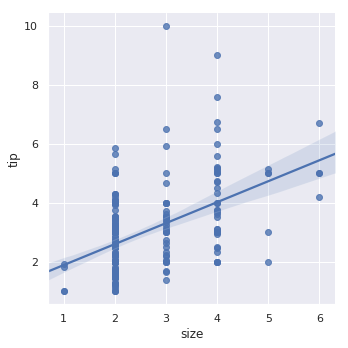

In [86]:
sns.lmplot(x="size", y="tip", data=tips);


1つのオプションは、ランダムノイズ（「ジッタ」）を離散値に追加して、それらの値の分布をより明確にすることです。ジッタは散布図データにのみ適用され、回帰直線のフィット自体には影響しないことに注意してください。

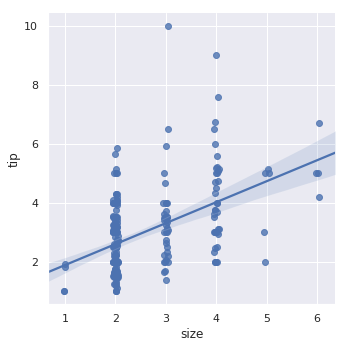

In [87]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

2番目のオプションは、各離散ビンの観測値を折りたたんで、信頼区間と共に中心傾向の推定値をプロットすることです。

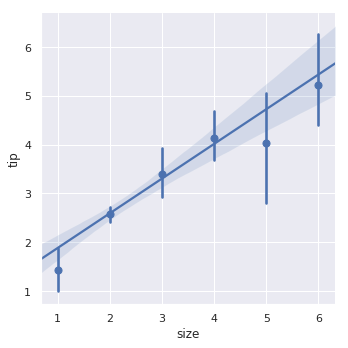

In [88]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

# さまざまな種類のモデルの適合
上記で使用した単純な線形回帰モデルは非常に簡単に適合できますが、一部の種類のデータセットには適していません。 Anscombeのカルテットデータセットは、単純な線形回帰が関係の同一の推定値を提供し、単純な目視検査で違いが明確に示されるいくつかの例を示しています。たとえば、最初のケースでは、線形回帰が適切なモデルです。

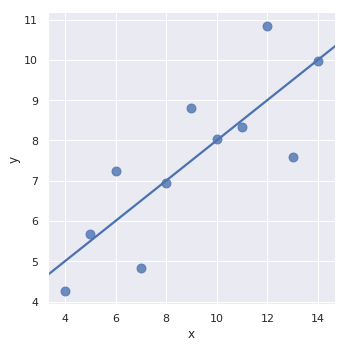

In [89]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});


2番目のデータセットの線形関係は同じですが、プロットはこれが適切なモデルではないことを明確に示しています。

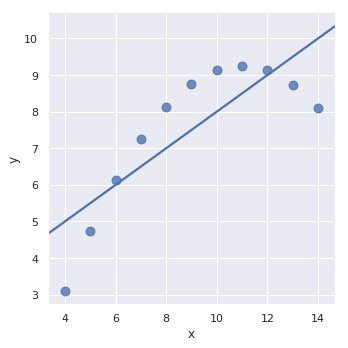

In [90]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});


これらの種類の高次の関係が存在する場合、lmplot（）およびregplot（）は、多項式回帰モデルに適合して、データセット内の単純な種類の非線形トレンドを探索できます。

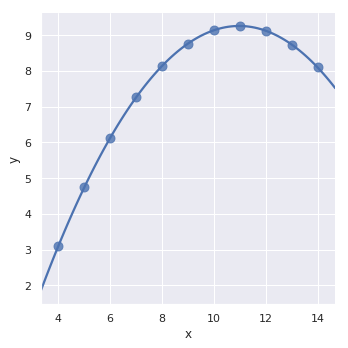

In [91]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

別の問題は、調査中の主な関係以外の何らかの理由で逸脱する「外れ値」の観測によって提起されます。

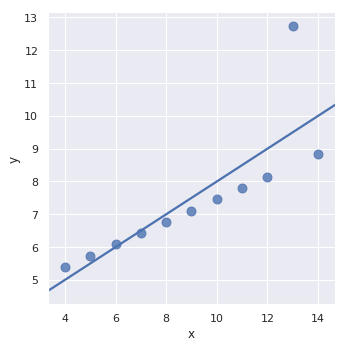

In [92]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

外れ値が存在する場合、異なる損失関数を使用して比較的大きな残差の重みを小さくするロバスト回帰を当てはめると便利です。

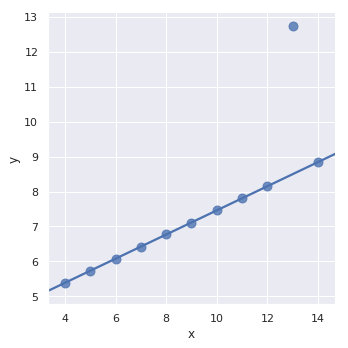

In [93]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

y変数がバイナリの場合、単純な線形回帰も「機能します」が、信じられない予測を提供します。

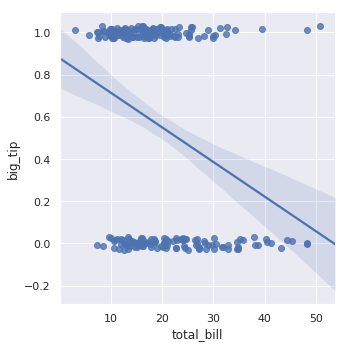

In [94]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

この場合の解決策は、ロジスティック回帰を当てはめることです。これにより、回帰直線は、与えられたxの値に対してy = 1の推定確率を示します。

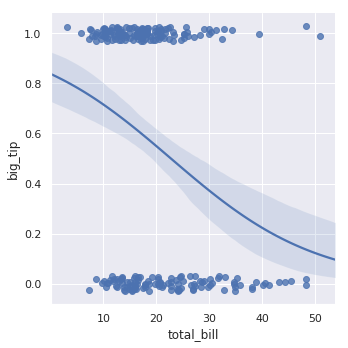

In [95]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

ロジスティック回帰の推定値は、単純な回帰よりもかなり計算集約的です（これはロバスト回帰にも当てはまります）。回帰直線の周囲の信頼区間はブートストラップ手順を使用して計算されるため、これをオフにして高速化することをお勧めします反復（ci = Noneを使用）。

まったく異なるアプローチは、低めのスムーザーを使用してノンパラメトリック回帰に適合させることです。このアプローチの仮定は最も少ないですが、計算量が多いため、現在、信頼区間はまったく計算されていません。

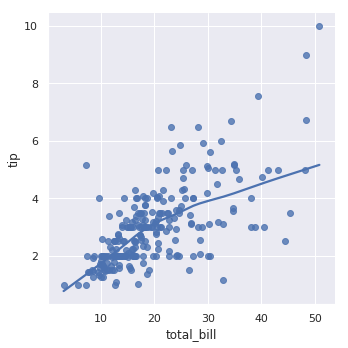

In [96]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

residplot（）関数は、単純な回帰モデルがデータセットに適しているかどうかを確認するための便利なツールです。単純な線形回帰を近似および削除し、各観測値の残差値をプロットします。理想的には、これらの値はy = 0の周囲にランダムに散在している必要があります。

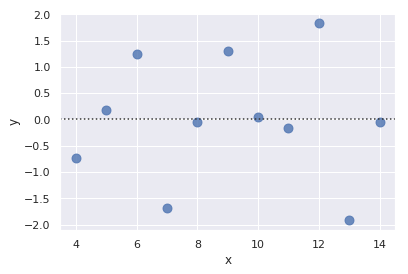

In [97]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

残差に構造がある場合、単純な線形回帰が適切でないことが示唆されます。

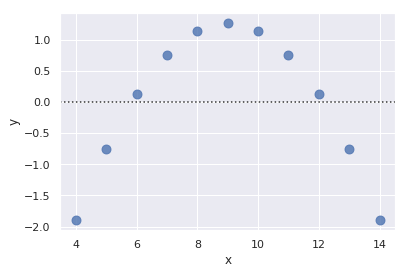

In [98]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

# 他の変数の条件付け
上記のプロットは、変数のペア間の関係を調べる多くの方法を示しています。しかし、多くの場合、より興味深い質問は、「これらの2つの変数間の関係が3番目の変数の関数としてどのように変化するか」です。 regplot（）は常に単一の関係を示しますが、lmplot（）はregplot（）とFacetGridを組み合わせて、最大3つの追加のカテゴリ変数との相互作用を調べることができる「ファセット」プロットの線形回帰を示す簡単なインターフェースを提供します。

関係を区別する最良の方法は、両方のレベルを同じ軸にプロットし、色を使用してそれらを区別することです。

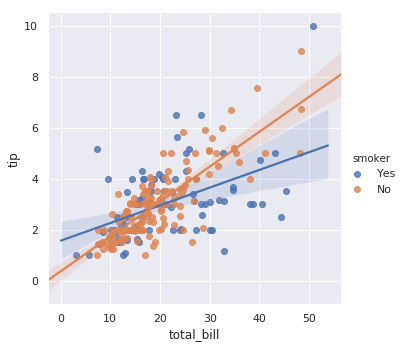

In [99]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);


色に加えて、さまざまな散布図マーカーを使用して、プロットの白黒再現性を高めることができます。また、使用する色を完全に制御できます。

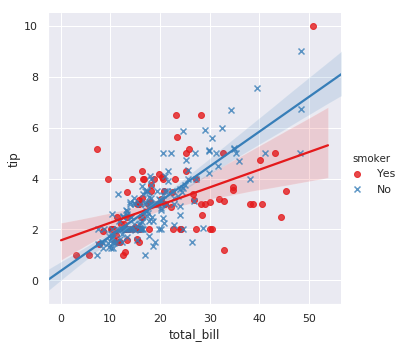

In [100]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

別の変数を追加するには、変数の各レベルがグリッドの行または列に表示される複数の「ファセット」を描画できます。

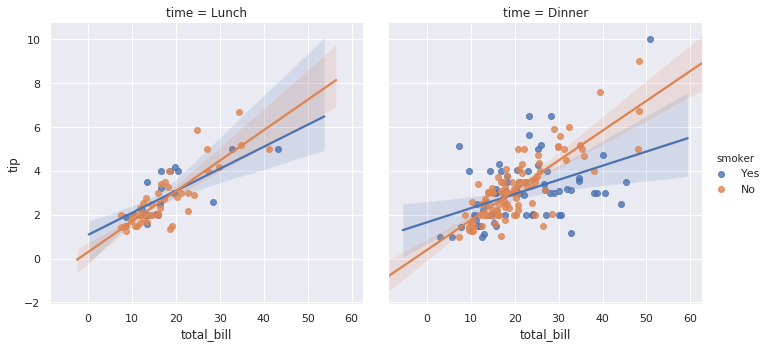

In [101]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

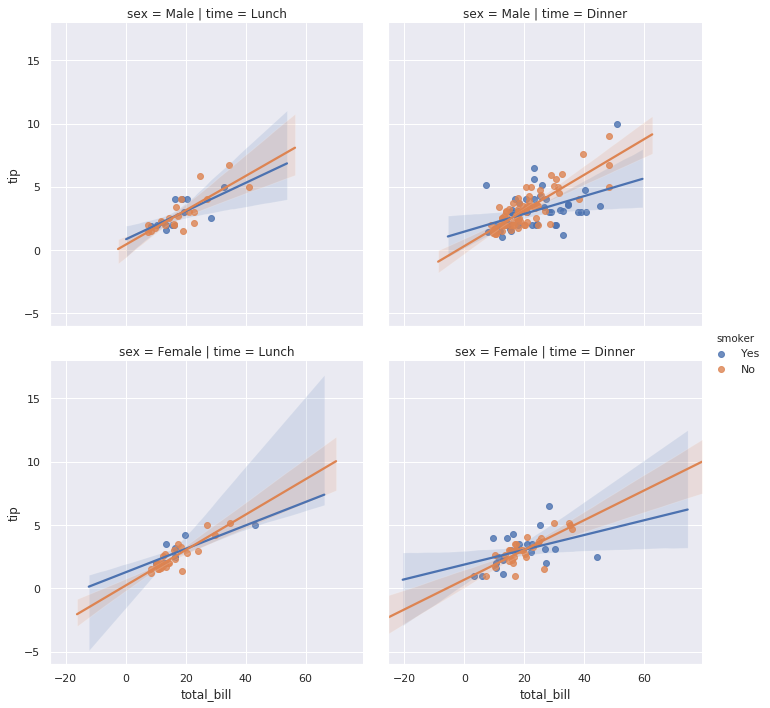

In [102]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

# プロットのサイズと形状の制御